In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
## ml models
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [66]:
raw_data = pd.read_csv('Wholesale customers data.csv')

In [67]:
raw_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [68]:
# features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
features = ['Fresh', 'Detergents_Paper']
norm_data = raw_data[features]

In [71]:
norm_data.head()

,Fresh,Detergents_Paper
0,12669,2674
1,7057,3293
2,6353,3516
3,13265,507
4,22615,1777


### Scatter Plot

Text(0.5, 1.0, 'Annual Spending')

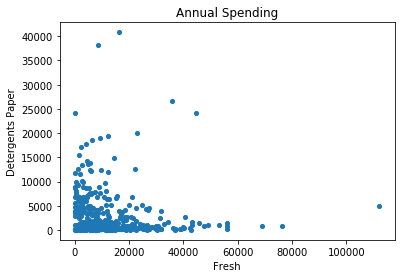

In [76]:
plt.scatter(norm_data['Fresh'], norm_data['Detergents_Paper'], s=10, linewidths=2)
plt.xlabel("Fresh")
plt.ylabel("Detergents Paper")
plt.title("Annual Spending")

### Elbow Method

Text(0, 0.5, 'Inertia')

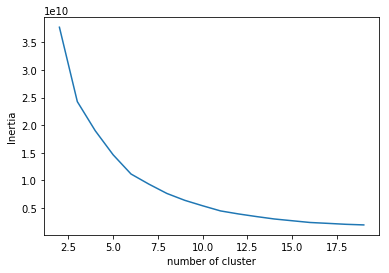

In [77]:
# Inertia (within-cluster sum of square)
sq_error = []
for num in range(2,20):
    kmeans = KMeans(n_clusters=num, n_init=10)
    kmeans.fit(norm_data)
    raw_data['cluster'] = kmeans.predict(norm_data)
#     silhouette_avg = silhouette_score(norm_data, kmeans.predict(norm_data))
#     sq_error.append(silhouette_avg)
    sq_error.append(kmeans.inertia_)

plt.plot(range(2,20), sq_error)
plt.xlabel("number of cluster")
plt.ylabel("Inertia")

### Cluster Data into 5 Groups

In [55]:
kmeans = KMeans(n_clusters=6, n_init=10)
kmeans.fit(raw_data[features])
raw_data['cluster'] = kmeans.predict(raw_data[features])

Text(0, 0.5, 'Detergents Paper')

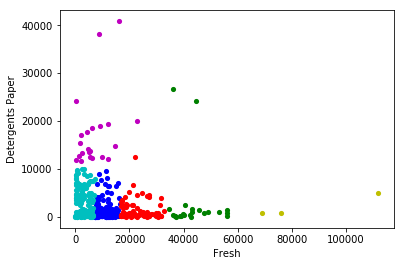

In [56]:
color_map = ['b', 'g', 'r', 'c', 'm', 'y']
for cluster in range(len(color_map)):
    pc1 = raw_data.loc[raw_data['cluster']==cluster]['Fresh']
    pc2 = raw_data.loc[raw_data['cluster']==cluster]['Detergents_Paper']
    plt.scatter(pc1, pc2, s=10, linewidths=2, color=color_map[cluster])
plt.xlabel("Fresh")
plt.ylabel("Detergents Paper")

In [57]:
mean_data = raw_data.groupby('cluster').mean()[features]
scaler = MinMaxScaler(feature_range=(0, 1))
uniform_data = pd.DataFrame(scaler.fit_transform(mean_data), columns=mean_data.columns)
uniform_data['color'] = color_map

In [58]:
uniform_data

,Fresh,Detergents_Paper,color
0,0.095446,0.010334,b
1,0.487445,0.097601,g
2,0.237854,0.000000,r
3,0.000000,0.092491,c
4,0.048763,1.000000,m
5,1.000000,0.050408,y
